In [26]:
import numpy as np
from scipy import signal
import scipy as sp
import scipy.io as io
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from os import path

In [ ]:
def calculate_welchs(data):
    welchs_by_elect_and_epoch = np.empty((256,len(data),2,101))

    for i_epoch in range(len(data)):
        epoch = data[i_epoch]
        for i_elect in range(len(epoch)):
            f,p = signal.welch(x=epoch[i_elect], fs=250)
            welchs_by_elect_and_epoch[i_elect,i_epoch] = np.array([f,p])
    
    return welchs_by_elect_and_epoch

In [ ]:
def calculate_power_mean(welchs_by_elect_and_epoch, frequency_range):
    freqs = welchs_by_elect_and_epoch[0,0,0,:]
    alphas_idxs = np.where((freqs>=frequency_range[0]) * (freqs<frequency_range[1]))
    alphas = welchs_by_elect_and_epoch[:,:,1,alphas_idxs]
    alphas = alphas[:,:,0,:]
    return alphas.mean()

In [ ]:
for t in ['P','S']:
    for i in range(1,11):
        try:
            data_file = path.join('../../../../data/',t) + "%02d" % (i) + '.mat'
            welch_file = 'welch_' + t + "%02d" % (i) + '.dmp'
            print(data_file)
            print(welch_file)
            data = io.loadmat(data_file)['data']
            print(data.shape)
            welch = calculate_welchs(data)
            welch.dump(welch_file)
        except Exception as exception:
            print(str(exception))
            pass



In [ ]:
def load_welchs_and_calculate_power_means(frequency_range):

    power_means = np.zeros((2,10))

    for t in ['P','S']:
        for i in range(1,11):
            try:
                welch_file = 'welch_' + t + "%02d" % (i) + '.dmp'
                print(welch_file)
                data = np.load(welch_file)
                print(data.shape)
                power_mean = calculate_power_mean(data, frequency_range)
                row = 0 if(t == 'P') else 1
                power_means[row, i-1] = power_mean
            except Exception as exception:
                print(str(exception))
                pass

    print(repr(power_means))
    return power_means

In [ ]:
frequencies_ranges = {"delta": (0,4), "theta": (4,8), "alpha": (8,13), "beta": (13,30), "gamma": (30,125)}

for name,frequency_range in frequencies_ranges.items():
    frequency_power_means = load_welchs_and_calculate_power_means(frequency_range)
    frequency_power_means.dump(name + 'power_means.dmp')


## 1c - graficos

In [43]:
alpha = np.load("alphapower_means.dmp").T
beta = np.load("betapower_means.dmp").T
gamma = np.load("gammapower_means.dmp").T
delta = np.load("deltapower_means.dmp").T
theta = np.load("thetapower_means.dmp").T

power_sum = alpha + beta + gamma + delta + theta

alpha_norm = alpha / power_sum
beta_norm = beta / power_sum
gamma_norm = gamma / power_sum
delta_norm = delta / power_sum
theta_norm = theta / power_sum

df = pd.DataFrame(alpha, columns=list('PS'))
df

,P,S
0,5.025695e-13,6.782564e-13
1,6.485887e-13,5.516866e-12
2,5.370765e-13,3.579495e-12
3,5.677615e-13,5.666000e-12
4,9.435580e-13,3.055012e-12
5,6.810575e-13,2.626486e-12
6,5.237744e-13,3.648882e-12
7,2.106549e-13,4.269945e-12
8,1.111945e-12,4.070030e-12
9,2.515370e-13,6.696400e-13


### stripplot

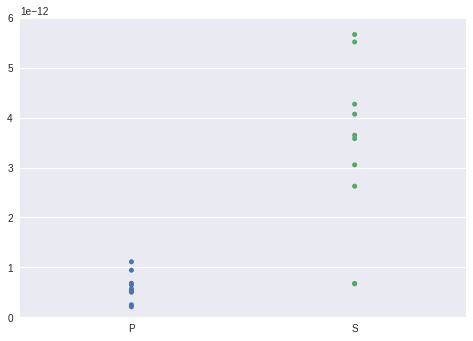

In [52]:
ax = sns.stripplot(data=df)
ax.set_autoscaley_on(True)
ax.set_ylim(1e-14,6e-12)
sns.plt.show()

### swarmplot

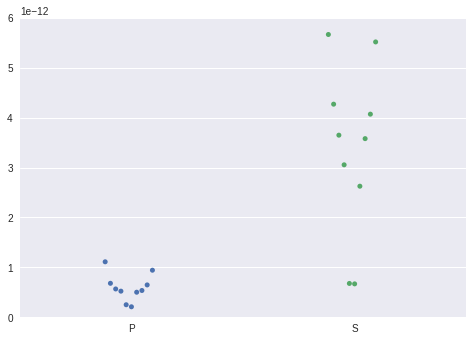

In [54]:
ax = sns.swarmplot(data=df)
ax.set_autoscaley_on(True)
ax.set_ylim(1e-14,6e-12)
sns.plt.show()

### boxplot

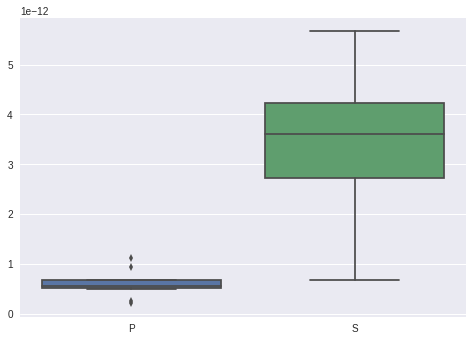

In [55]:
ax = sns.boxplot(data=df)
ax.set_autoscaley_on(True)
sns.plt.show()

### violinplot

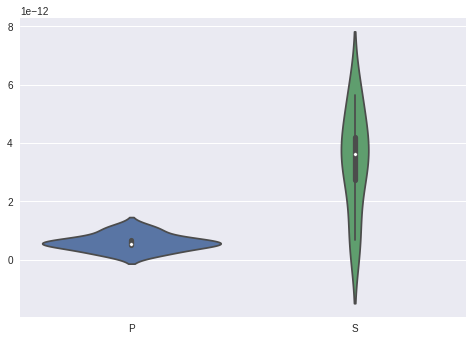

In [48]:
ax = sns.violinplot(data=df)
ax.set_autoscaley_on(True)
sns.plt.show()

### lvplot

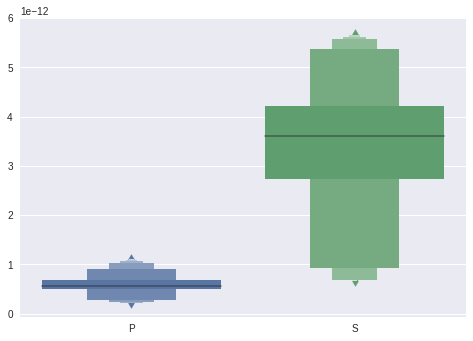

In [57]:
ax = sns.lvplot(data=df)
ax.set_autoscaley_on(True)
sns.plt.show()

### pointplot

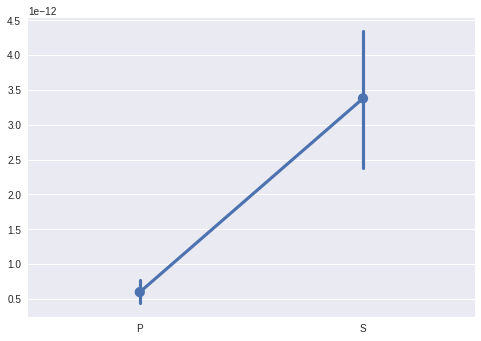

In [58]:
ax = sns.pointplot(data=df)
ax.set_autoscaley_on(True)
sns.plt.show()

### barplot

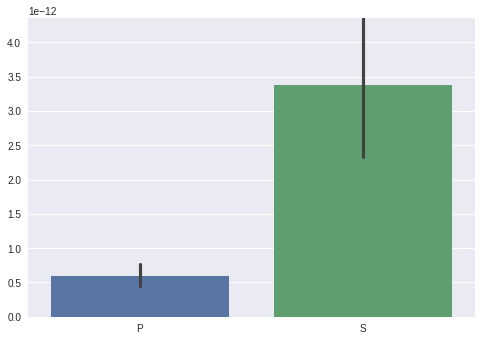

In [59]:
ax = sns.barplot(data=df)
ax.set_autoscaley_on(True)
sns.plt.show()

### countplot

### punto C)

In [24]:
def plot_violin(df):
    ax = sns.violinplot(data=df)
    ax.set_autoscaley_on(True)
    sns.plt.show()
    
def test_same_mean(data1, data2):
    t, p_value = sp.stats.ttest_rel(data1, data2)
    print(p_value)
    return "No hay evidencia suficiente para rechazar la hipotesis nula" if (p_value > 0.05) else "Se rechaza la hipotesis nula"

#### delta frecuencies

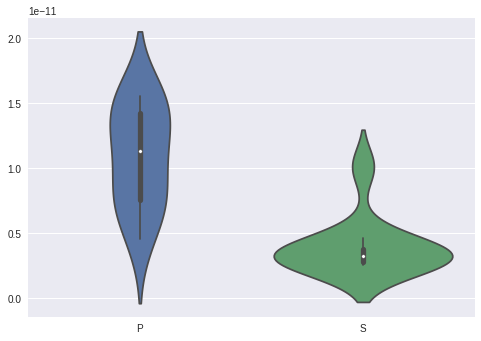

0.000342123021654
Se rechaza la hipotesis nula


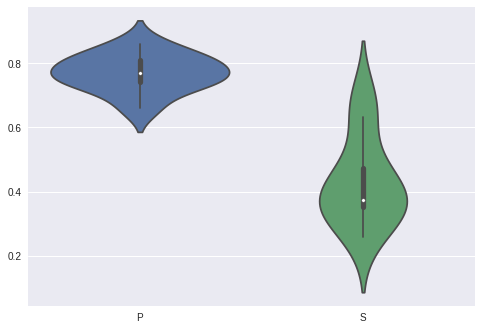

3.83058296547e-05
Se rechaza la hipotesis nula


In [62]:
df = pd.DataFrame(delta, columns=list('PS'))
plot_violin(df)

print(test_same_mean(df['P'], df['S']))

df = pd.DataFrame(delta_norm, columns=list('PS'))
plot_violin(df)

print(test_same_mean(df['P'], df['S']))


#### theta frecuencies 

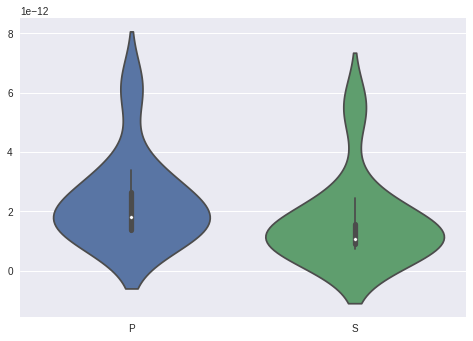

0.0143189775996
Se rechaza la hipotesis nula


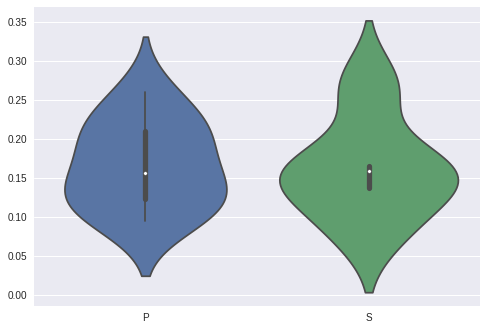

0.903634411724
No hay evidencia suficiente para rechazar la hipotesis nula


In [63]:
df = pd.DataFrame(theta, columns=list('PS'))
plot_violin(df)

print(test_same_mean(df['P'], df['S']))

df = pd.DataFrame(theta_norm, columns=list('PS'))
plot_violin(df)

print(test_same_mean(df['P'], df['S']))


#### beta frecuencies

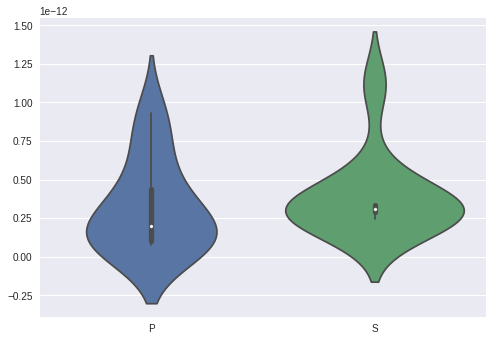

0.488112683261
No hay evidencia suficiente para rechazar la hipotesis nula


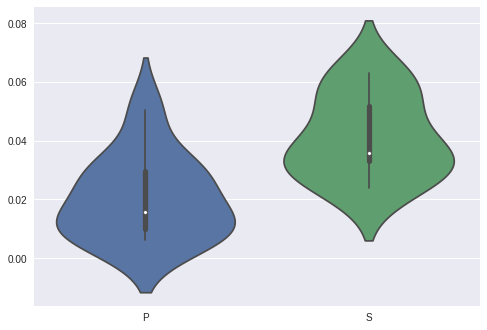

0.00660962793223
Se rechaza la hipotesis nula


In [64]:
df = pd.DataFrame(beta, columns=list('PS'))
plot_violin(df)

print(test_same_mean(df['P'], df['S']))

df = pd.DataFrame(beta_norm, columns=list('PS'))
plot_violin(df)

print(test_same_mean(df['P'], df['S']))


#### gamma frecuencies

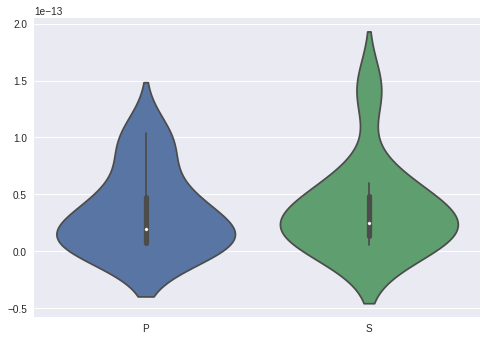

0.781504400484
No hay evidencia suficiente para rechazar la hipotesis nula


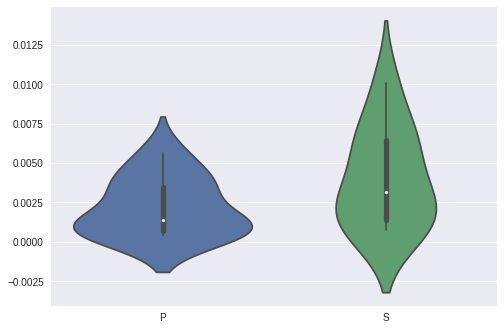

0.111784993153
No hay evidencia suficiente para rechazar la hipotesis nula


In [65]:
df = pd.DataFrame(gamma, columns=list('PS'))
plot_violin(df)

print(test_same_mean(df['P'], df['S']))

df = pd.DataFrame(gamma_norm, columns=list('PS'))
plot_violin(df)

print(test_same_mean(df['P'], df['S']))
